In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import backend as K
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from PIL import Image

import numpy as np
from numpy.testing import assert_allclose, assert_equal
import matplotlib
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.
/home/oziomek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/oziomek/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
path = '/home/oziomek/licencjat/kostki/zdjecia/redOnRed_white/'
photos_number = 1680
photos_per_set = 280
num_samples = 0
for i in range(1, 7):
    num_samples += len(os.listdir(path + str(i)))
assert_equal(1680, num_samples)
print(num_samples)

1680


In [3]:
immatrix = np.array(
    [np.array(Image.open(path + str(i) + '/' + file)).flatten()
         for i in range(1, 7) 
         for file in os.listdir(path+str(i))], 'f')
print(immatrix.shape)

(1680, 4096)


In [4]:
labels = np.ones((num_samples, ), dtype=int)
counter = 0
for i in range(0, photos_number, photos_per_set):
    labels[i:i+photos_per_set] = counter
    counter +=1

In [5]:
X_test, y_test = shuffle(immatrix, labels, random_state=7)
rows, cols = 64, 64
print(X_test.shape)

(1680, 4096)


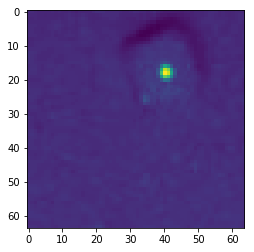

In [6]:
img=immatrix[172].reshape(rows, cols)
plt.imshow(img)
plt.show()

In [7]:
X_test = X_test.reshape(X_test.shape[0], 1, rows, cols).astype('float32')
X_test /= 255
print(X_test.shape)

(1680, 1, 64, 64)


In [8]:
y_test = to_categorical(y_test, 6)
print(y_test.shape)

(1680, 6)


In [9]:
model = load_model('model_continue-10-0.0031.h5')

In [10]:
# prediction = model.predict(X_test)
# print(prediction)

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
for i in range(len(model.metrics_names)):
    print(str(model.metrics_names[i]) + ": " + str(scores[i]))

1680/1680 [==============================] - 33s 20ms/step
loss: 5.97594165802
acc: 0.275


In [12]:
second_model = load_model('../cnn_continue/model_dist-10-1.0435.h5')

In [13]:
second_scores = second_model.evaluate(X_test, y_test, verbose=1)
for i in range(len(second_model.metrics_names)):
    print(str(second_model.metrics_names[i]) + ": " + str(second_scores[i]))

1680/1680 [==============================] - 39s 23ms/step
loss: 3.77133147376
acc: 0.171428571429
